# Analytical model of the disk bending
In this notebook we analyse the bending of the disk due to thermal lens effects. 
A complete derivation of the model can be found in the thesis of K. Schuhmann (Diss. ETH No. 24327). 

In [2]:
%pylab inline
from sympy import *

Populating the interactive namespace from numpy and matplotlib


In [3]:
init_printing()

In [4]:
rcParams['font.size'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['ytick.labelsize'] = 15

In [5]:
z, phi, E_HS, E_AM, d_HS, d_AM, l_HS, l_AM, a_HS, a_AM = symbols('z, varphi, E_HS, E_AM, d_HS, d_AM, lambda_HS, lambda_AM, alpha_HS, alpha_AM')
delT_HS, delT_AM, delL_HS, delL_AM = symbols('{\Delta}T_{HS}, {\Delta}T_{AM}, {\Delta}L_{HS}, {\Delta}L_{AM}')
A, B, V = symbols('A, B, V')

### Temperature gradient
In this section we analyse the model for the temperature gradient in the active medium and the heat sink. 

In [6]:
# temperature distribution in the heat sink
dT_HS = phi*d_AM*z/l_HS
dT_HS_func = lambdify((z, phi, d_AM, l_HS), dT_HS)

# temperature distribution in the active medium
dT_AM = phi*d_AM*d_HS/l_HS + 0.5*phi*(d_AM**2-(d_HS+d_AM-z)**2)/l_AM
dT_AM_func = lambdify((z, phi, d_AM, d_HS, l_AM, l_HS), dT_AM)

In [7]:
# free thermal expansion in the heat sink
dL_HS = a_HS * dT_HS
dL_HS_func = lambdify((z, phi, d_AM, l_HS, a_HS), dL_HS) 

# free thermal expansion in the active medium
dL_AM = a_AM * dT_AM
dL_AM_func = lambdify((z, phi, d_AM, d_HS, l_AM, l_HS, a_AM), dL_AM)

In [8]:
# elastic potential energy in the assembly
U = integrate(E_HS*(dL_HS-(A+B*z))**2, (z, 0, d_HS)) + integrate(E_AM*(dL_AM-(A+B*z))**2, (z, d_HS, d_HS+d_AM))

# derivative with respect to free parameter A
U_A = nsimplify(collect(collect(simplify(diff(U, A)/2), A), B))

# derivative with respect to free parameter B
U_B = nsimplify(collect(collect(simplify(diff(U, B)/2), A), B))

# thermal lens of the assembly
dV = 2*solveset(solveset(U_A, A).args[0] - solveset(U_B, A).args[0], B).args[0]
dV_func = lambdify((phi, d_AM, d_HS, l_AM, l_HS, a_AM, a_HS, E_AM, E_HS), dV)

In [9]:
# thickness [mm]
d_HS = 1.5
d_AM = 0.14

# heat rate [W/mm**3]
phi = 50.0

# thermal conductivity [W/mm/K]
l_HS = 1900.0e-3
l_AM = 7.0e-3

# thermal expansion coefficient [1/K]
a_HS = 0.9e-6
a_AM = 8.0e-6

# Young's modulus [Pa]
E_AM = 300.0e9
E_HS = 1100.0e9

In [10]:
display(Eq(delT_HS, dT_HS))
#print(latex(dT_HS))

In [11]:
display(Eq(delT_AM, dT_AM))
#print(latex(dT_AM))

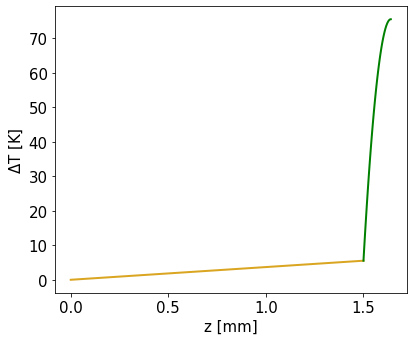

In [12]:
z_HS = linspace(0, d_HS, 50)
z_AM = linspace(d_HS, d_HS+d_AM, 50)

fig, ax = subplots(figsize=(6,5))

ax.plot(z_HS, dT_HS_func(z_HS, phi, d_AM, l_HS), 'goldenrod', label='heat sink', lw=2)
ax.plot(z_AM, dT_AM_func(z_AM, phi, d_AM, d_HS, l_AM, l_HS), 'green', label='active medium', lw=2)

ax.set_title('Temperature Gradient\n')
ax.set_xlabel('z [mm]')
ax.set_ylabel('$\Delta$T [K]')
ax.legend(loc='best')

fig.tight_layout()
#fig.savefig('img/TemperatureGradient.pdf')

show()

### Thermal expansion
In this section we calculate the thermal expansion of the active medium and the heat sink from the above calculated temperature distribution. 

In [13]:
display(Eq(delL_HS, dL_HS))
#print(latex(dL_HS))

In [15]:
display(Eq(delL_AM, dL_AM))
#print(latex(dL_AM))

In [16]:
fig, ax = subplots(figsize=(6,5))

ax.plot(z_HS, 1e6*dL_HS_func(z_HS, phi, d_AM, l_HS, a_HS), 'goldenrod', label='heat sink', lw=2)
ax.plot(z_AM, 1e6*dL_AM_func(z_AM, phi, d_AM, d_HS, l_AM, l_HS, a_AM), 'green', label='active medium', lw=2)

ax.set_title('Free Thermal Expansion\n')
ax.set_xlabel('z [mm]')
ax.set_ylabel('$\Delta$L/L [ppm]')
ax.legend(loc='best')

fig.tight_layout()
#fig.savefig('img/ThermalExpansion.pdf')

show()

In [17]:
collect(U_B, phi)

In [18]:
U_B

In [19]:
print(latex(U_B))

A \left(\frac{E_{AM} d_{AM}^{2}}{2} + E_{AM} d_{AM} d_{HS} + \frac{E_{HS} d_{HS}^{2}}{2}\right) + B \left(\frac{E_{AM} d_{AM}^{3}}{3} + E_{AM} d_{AM}^{2} d_{HS} + E_{AM} d_{AM} d_{HS}^{2} + \frac{E_{HS} d_{HS}^{3}}{3}\right) - \frac{5 E_{AM} \alpha_{AM} d_{AM}^{4} \varphi}{24 \lambda_{AM}} - \frac{E_{AM} \alpha_{AM} d_{AM}^{3} d_{HS} \varphi}{2 \lambda_{HS}} - \frac{E_{AM} \alpha_{AM} d_{AM}^{3} d_{HS} \varphi}{3 \lambda_{AM}} - \frac{E_{AM} \alpha_{AM} d_{AM}^{2} d_{HS}^{2} \varphi}{\lambda_{HS}} - \frac{E_{HS} \alpha_{HS} d_{AM} d_{HS}^{3} \varphi}{3 \lambda_{HS}}


In [20]:
display(dV)
print(latex(dV))

\frac{d_{AM} \varphi \left(E_{AM}^{2} \alpha_{AM} d_{AM}^{4} \lambda_{HS} + 5 E_{AM} E_{HS} \alpha_{AM} d_{AM}^{3} d_{HS} \lambda_{HS} + 12 E_{AM} E_{HS} \alpha_{AM} d_{AM}^{2} d_{HS}^{2} \lambda_{AM} + 4 E_{AM} E_{HS} \alpha_{AM} d_{AM}^{2} d_{HS}^{2} \lambda_{HS} + 12 E_{AM} E_{HS} \alpha_{AM} d_{AM} d_{HS}^{3} \lambda_{AM} - 6 E_{AM} E_{HS} \alpha_{HS} d_{AM}^{2} d_{HS}^{2} \lambda_{AM} - 4 E_{AM} E_{HS} \alpha_{HS} d_{AM} d_{HS}^{3} \lambda_{AM} + 2 E_{HS}^{2} \alpha_{HS} d_{HS}^{4} \lambda_{AM}\right)}{\lambda_{AM} \lambda_{HS} \left(E_{AM}^{2} d_{AM}^{4} + 4 E_{AM} E_{HS} d_{AM}^{3} d_{HS} + 6 E_{AM} E_{HS} d_{AM}^{2} d_{HS}^{2} + 4 E_{AM} E_{HS} d_{AM} d_{HS}^{3} + E_{HS}^{2} d_{HS}^{4}\right)}


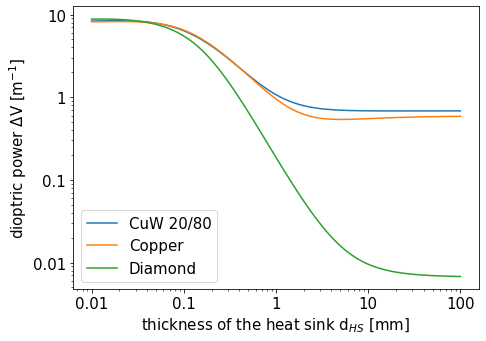

In [21]:
d_HS_arr = logspace(-2, 2, 100)

fig, ax = subplots(figsize=(7,5))

#ax.loglog(d_HS_arr, [1e3*dV_func(phi, d_AM, d, l_AM, 235e-3, a_AM, 23.1e-6, E_AM, 70e9) for d in d_HS_arr], label='Al')
#ax.loglog(d_HS_arr, [1e3*dV_func(phi, d_AM, d, l_AM, 305e-3, a_AM, 4.5e-6, E_AM, 700e9) for d in d_HS_arr], label='SiC')
ax.loglog(d_HS_arr, [1e3*dV_func(phi, d_AM, d, l_AM, 180e-3, a_AM, 8.8e-6, E_AM, 280e9) for d in d_HS_arr], label='CuW 20/80')
ax.loglog(d_HS_arr, [1e3*dV_func(phi, d_AM, d, l_AM, 401e-3, a_AM, 17e-6, E_AM, 128e9) for d in d_HS_arr], label='Copper')
ax.loglog(d_HS_arr, [1e3*dV_func(phi, d_AM, d, l_AM, l_HS, a_AM, a_HS, E_AM, E_HS) for d in d_HS_arr], label='Diamond')

ax.set_xlabel('thickness of the heat sink d$_{HS}$ [mm]')
ax.set_ylabel('dioptric power $\Delta$V [m$^{-1}$]')
ax.legend(loc='lower left')

ax.xaxis.set_major_formatter(FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))
ax.yaxis.set_major_formatter(FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))

fig.tight_layout()
#fig.savefig('img/BendingHSThickness.pdf')

show()

In [22]:
# thermal heat flux density [W/mm**2]
Phi = 7

d_AM_arr = logspace(-2, 0, 100)

fig, ax = subplots(figsize=(7,5))

ax.loglog(1e3*d_AM_arr, [1e3*dV_func(Phi/d, d, d_HS, l_AM, l_HS, a_AM, a_HS, E_AM, E_HS) for d in d_AM_arr])

ax.set_xlabel('thickness of the active medium d$_{AM}$ [$\mu$m]')
ax.set_ylabel('dioptric power $\Delta$V [m$^{-1}$]')

ax.xaxis.set_major_formatter(FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))
ax.yaxis.set_major_formatter(FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))

fig.tight_layout()
#fig.savefig('img/BendingAMThickness.pdf')

show()

In [23]:
# thermal heat flux density [W/mm**2], 50 W/mm**2 is the damage threshold of the active medium
Phi_arr = 0.2*linspace(0, 50, 100)

# thickness [mm]
d_AM = 0.237
d_HS = 1.5

R = 2170

fig, ax = subplots(figsize=(7,5))

dV_arr = [1e3*dV_func(Phi/d_AM, d_AM, d_HS, l_AM, l_HS, a_AM, a_HS, E_AM, E_HS) for Phi in Phi_arr]
dR_arr = [2 / (2-R*dV) for dV in dV_arr]
ax.plot(Phi_arr, dV_arr)

ax.set_xlabel('heat flux density [W/mm$^2$]')
ax.set_ylabel('dioptric power $\Delta$V [m$^{-1}$]')

fig.tight_layout()

show()

In [24]:
# assuming that only the not emitted light energy is converted into heat

# pump diameter [mm]
d_pump = 6
A_pump = (d_pump / 2)**2 * pi

pumpPower = linspace(0, 1000, 100)
energyFluxDensity = pumpPower / A_pump

fig, ax = subplots(figsize=(7,5))

for wlen in [940, 969]:
    heatFluxDensity = (1 - wlen/1030) * energyFluxDensity
    ax.plot(pumpPower, [1e3*dV_func(Phi/d_AM, d_AM, d_HS, l_AM, l_HS, a_AM, a_HS, E_AM, E_HS) for Phi in heatFluxDensity], label='$\lambda$ = {} nm'.format(wlen))

ax.set_xlabel('pump power [W]')
ax.set_ylabel('dioptric power $\Delta$V [m$^{-1}$]')
ax.legend()  

fig.tight_layout()
#fig.savefig('img/DiskBendingPumpPower.pdf')

show()